In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

df = pd.read_csv('Statistics_Dataset/coffee_dataset.csv')

$H_{0}$ : $\mu$ <= 70

$H_{1}$ : $\mu$ > 70

In [4]:
sample_df = df.sample(150)

boot_mean = []

for _ in range(10000):
    bootsample = df.sample(150, replace=True)
    boot_mean.append(bootsample.height.mean())

In [5]:
np.std(boot_mean)

0.2561863483314547

In [6]:
null_vals = np.random.normal(70, np.std(boot_mean), 10000)

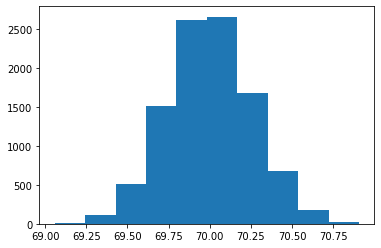

In [7]:
plt.hist(null_vals);

In [8]:
sample_df.height.mean()

67.63297688228066

**We do not believe that our null hypothesis value of 70 would be supported, which is true. However, since our null is that the population mean is less than or equal to 70, we do have evidence to support this claim with our sample mean of approximately 67. This would suggest not rejecting our one-sided null alternative.**

**If we had a null where we asked if the population mean was equal to 70, then we would be able to reject this null in favor of an alternative that suggested the population mean was actually different from 70.**

### Calculating p-value

$H_{0} <= 70$

$H_{1} > 70$

In [28]:
sample_mean = sample_df.height.mean()
null_mean = null_vals.mean()

70.00001051113853

In [29]:
(null_vals > sample_df.height.mean()).mean() # Fail to Reject Null Hypothesis

1.0

$H_{0} >= 70$

$H_{1} < 70$

In [17]:
(null_vals < sample_mean).mean() # Reject Null Hypothesis

0.0

$H_{0} = 70$

$H_{1} \neq 70$

In [34]:
(null_vals < sample_mean).mean() + (null_vals > null_mean + (null_mean - sample_mean)).mean()  # Fail to Reject Null Hypothesis

0.0

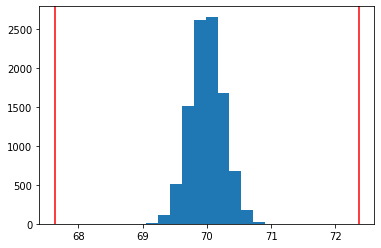

In [35]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals)
plt.axvline(low, color='r')
plt.axvline(high, color='r');